In [18]:
import pandas as pd
import numpy as np
import graphviz
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
adult_tr = pd.read_csv(r'C:\Users\jacob\Downloads\DSPR_Data_Sets\Website Data Sets\adult_ch6_training')
y= adult_tr[['Income']]
adult_tr.head()

,Marital status,Income,Cap_Gains_Losses
0,Never-married,<=50K,0.02174
1,Divorced,<=50K,0.00000
2,Married,<=50K,0.00000
3,Married,<=50K,0.00000
4,Married,<=50K,0.00000


In [29]:
# Categorical variable "marital" has to be converted to a dummy variable form. Create a series of dummy variables for Marital 
# Status using the categorical() command
mar_np = np.array(adult_tr['Marital status']) # turn marital status into an array to create a matrix of dummy variables
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames = True)
mar_cat_pd

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
18756,1.0,0.0,0.0,0.0,0.0
18757,0.0,1.0,0.0,0.0,0.0
18758,0.0,1.0,0.0,0.0,0.0
18759,1.0,0.0,0.0,0.0,0.0


In [20]:
mar_cat_pd = pd.DataFrame(mar_cat) #Create a dataframe using the mar_cat matrix
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis = 1) #Attach cap_gains_losses to the mar_cat df
X

,Cap_Gains_Losses,0,1,2,3,4
0,0.02174,0.0,0.0,1.0,0.0,0.0
1,0.00000,1.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,1.0,0.0,0.0,0.0
3,0.00000,0.0,1.0,0.0,0.0,0.0
4,0.00000,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
18756,0.00000,1.0,0.0,0.0,0.0,0.0
18757,0.00000,0.0,1.0,0.0,0.0,0.0
18758,0.00000,0.0,1.0,0.0,0.0,0.0
18759,0.00000,1.0,0.0,0.0,0.0,0.0


In [21]:
X_names = ["Cap_Gains_Losses", "Divorced", "Married", "Never-married", "Separated", "Widowed"] #labeling the columns
X_names #Display the column headers


['Cap_Gains_Losses',
 'Divorced',
 'Married',
 'Never-married',
 'Separated',
 'Widowed']

In [22]:
y_names = ["<=50k", ">50k"]
y

,Income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
18756,<=50K
18757,<=50K
18758,<=50K
18759,<=50K


In [23]:
# Break here for the C5.0 decision tree model
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y)


In [24]:
cart01

DecisionTreeClassifier(max_leaf_nodes=5)

In [25]:
export_graphviz(cart01, out_file = "cart01.dot", 
               feature_names = X_names, class_names = y_names) 

In [26]:
predIncomeCART = cart01.predict(X)


In [27]:
graphviz.render('dot', 'png', 'cart01.dot')

'cart01.dot.png'

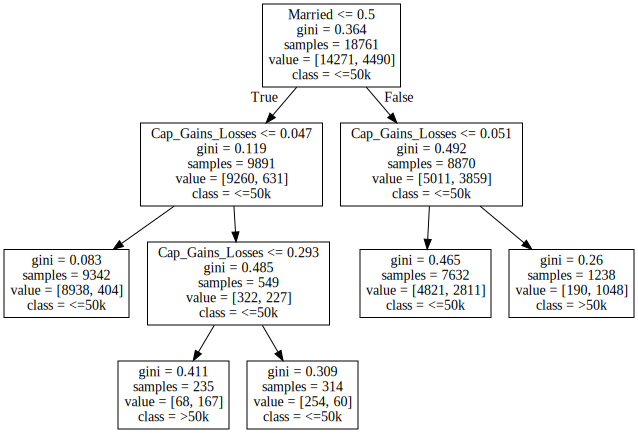

In [28]:
graphviz.Source.from_file('cart01.dot') 

The first node of the decision tree splits on "married", determining whether the record is married or some other status. The "true" branch of married then splits to CGL <= 0.047, and then terminates in a root node with 9342 records having income <= 50K if their CGL is <= 0.047. For the records on this branch where the CGL is >0.047, we split again with CGL <= 0.293. For records where this condition is true, we predict the income to be >= 50k for 235 samples, and for conditions where this is false, we predict the income to be <= 50k.

Looking at records at the root node which are "false" for married, the tree looks at CGL <= 0.051. If that is true, it predicts that income is <= 50k, and if false, that income is >= 50k.